# Gas Flow Rate for rTPC with Calibrated Rotameters

The original calibration for the tubes on graph paper (ca 1980) have been digitized using
[Engauge Digitizer](https://github.com/markummitchell/engauge-digitizer)

In [1]:
import csv
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,8)

## Setup for Argon

Tube E603, S/N 3-36, using pyrex floater

In [2]:
flow1=np.array([])
ball1=np.array([])
with open('E603_SN3-36_Argon_PY.csv', newline='') as csvfile:
    fcsv=csv.reader(csvfile, delimiter=',')
    n=0
    for row in fcsv:
        n+=1
        if n==1: continue 
        flow1=np.append(flow1,float(row[0]))
        ball1=np.append(ball1,float(row[1]))

Determine range of the floater and interpoloate data

In [3]:
maxx1=np.floor(np.amax(ball1))
x1=np.linspace(0.0,maxx1,int(maxx1))
arflow=interpolate.interp1d(ball1,flow1)

## Setup for Carbon Dioxide

Tube E602, S/N 2-28, using stainless steel floater

In [4]:
flow2=np.array([])
ball2=np.array([])
with open('E602_SN2-28_CarbonDioxide_SS.csv', newline='') as csvfile:
    fcsv=csv.reader(csvfile, delimiter=',')
    n=0
    for row in fcsv:
        n+=1
        if n==1: continue 
        flow2=np.append(flow2,float(row[0]))
        ball2=np.append(ball2,float(row[1]))

Determine range of the floater and interpoloate data

In [5]:
maxx2=np.floor(np.amax(ball2))
x2=np.linspace(0.0,maxx2,int(maxx2))
co2flow=interpolate.interp1d(ball2,flow2)

## Plot

Both curves on the same diagram

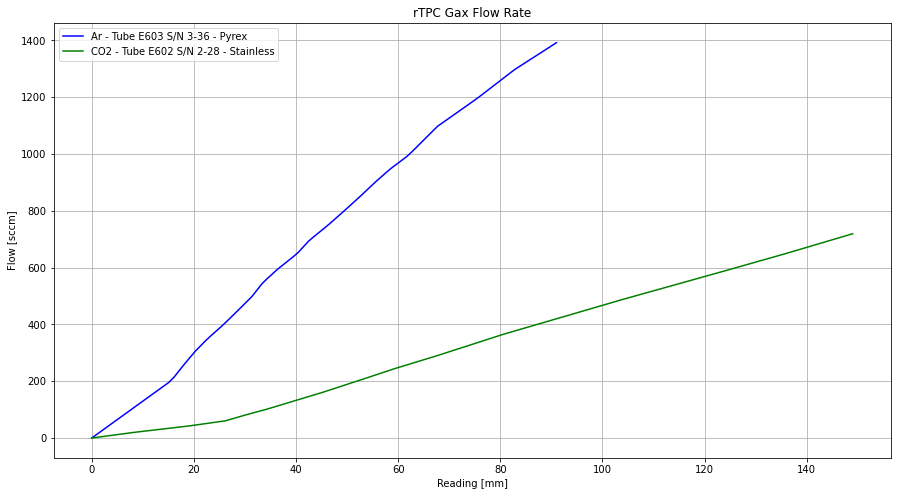

In [6]:
plt.plot(x1, arflow(x1), 'b', label='Ar - Tube E603 S/N 3-36 - Pyrex')
plt.plot(x2, co2flow(x2), 'g', label='CO2 - Tube E602 S/N 2-28 - Stainless')
plt.title('rTPC Gax Flow Rate')
plt.xlabel('Reading [mm]')
plt.ylabel('Flow [sccm]')
plt.grid()
plt.legend(loc='upper left')
plt.show()

## Reading

Carbon Dioxide reading in mm
https://photos.app.goo.gl/H5yNruf45UrVTZTd8

In [7]:
zco2=80

Argon reading in mm
https://photos.app.goo.gl/ZeqEzrGQEvRKrve39

In [8]:
zar=52

In [9]:
fco2=co2flow(zco2)
far=arflow(zar)
ftot=fco2+far
Q=fco2/ftot
print(f'CO2 flow: {fco2:.0f} sccm')
print(f'Ar flow: {far:.0f} sccm')
print(f'Total Flow: {ftot:.0f} sccm')
print(f'Quencher Fraction {Q*1.e2:.0f}%')

CO2 flow: 362 sccm
Ar flow: 841 sccm
Total Flow: 1203 sccm
Quencher Fraction 30%
